In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    LHS = tx.T.dot(tx)
    RHS = tx.T.dot(y)
    w = np.linalg.solve(LHS,RHS)
    
    err = y - tx.dot(w)
    loss_mse = err.T.dot(err)/(2*len(y))

    return w, loss_mse
    # returns mse, and optimal weights
    # ***************************************************
    # raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    weight, loss = least_squares(y, tx)
    print("w0*:{}, w1*:{}, loss*:{}".format(weight[0], weight[1], loss))
    # ***************************************************
    # raise NotImplementedError

Test it here

In [4]:
test_your_least_squares()

w0*:73.29392200210522, w1*:13.47971243498905, loss*:15.3858878688294


In [5]:
# The result of grid search (10000 data points, 10 intervals):
# w0*=66.66666666666669, w1*=16.666666666666686, loss*=42.42448314678248

# The result of least square:
# w0*:73.29392200210522, w1*:13.47971243498905, loss*:15.3858878688294

# The least square method performs better in this case

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [35]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly = np.ones((len(x), 1))
    
    for degrees in range(1, degree):
        poly = np.c_[poly, np.power(x, degrees)]
    
    return poly
    # ***************************************************
    # raise NotImplementedError

In [36]:
def compute_mse(y, tx, w):
    err = y - tx.dot(w)
    loss = np.mean(err**2) / 2
    return loss

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [37]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        x_poly = build_poly(x, degree)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        weights, _ = least_squares(y, x_poly)
        rmse = np.sqrt(2 * compute_mse(y, x_poly, weights))
        # ***************************************************
        # raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.46698196895441413
Processing 3th experiment, degree=7, rmse=0.24969890274508405
Processing 4th experiment, degree=12, rmse=0.24452913643990384


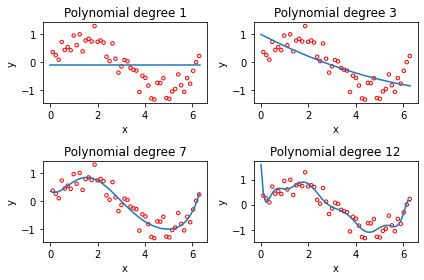

In [38]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [40]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    rows = len(y)
    
    # use random indices for data splitting
    r_index = np.random.permutation(rows)
    
    # calculate number of rows for training and testing
    r_train = round(ratio * len(y))
    r_test = round((1 - ratio) * len(y))
    
    # split the original dataset
    i_train = r_index[:r_train]
    i_test = r_index[r_train:]
    
    x_train = x[i_train]
    x_test = x[i_test]
    
    y_train = y[i_train]
    y_test = y[i_test]
    
    return x_train, x_test, y_train, y_test
    # ***************************************************
    # raise NotImplementedError

Then, test your `split_data` function below.

In [42]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    poly_xtr = build_poly(x_tr, degree)
    poly_xte = build_poly(x_te, degree)
    
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    weight, _ = least_squares(y_tr, poly_xtr)
    
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2 * compute_mse(y_tr, poly_xtr, weight))
    rmse_te = np.sqrt(2 * compute_mse(y_te, poly_xte, weight))
    
    # ***************************************************
    # raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [43]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.734, Testing RMSE=0.403
proportion=0.9, degree=3, Training RMSE=0.487, Testing RMSE=0.211
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.214
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.253
proportion=0.5, degree=1, Training RMSE=0.795, Testing RMSE=0.611
proportion=0.5, degree=3, Training RMSE=0.451, Testing RMSE=0.565
proportion=0.5, degree=7, Training RMSE=0.233, Testing RMSE=0.282
proportion=0.5, degree=12, Training RMSE=0.208, Testing RMSE=0.605
proportion=0.1, degree=1, Training RMSE=0.820, Testing RMSE=0.805
proportion=0.1, degree=3, Training RMSE=0.279, Testing RMSE=0.686
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.612
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.753


# 3 Ridge Regression
Please fill in the function below.

In [45]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    LHS = tx.T.dot(tx) + 2*tx.shape[0]*lambda_*np.identity(tx.shape[1])
    RHS = tx.T.dot(y)
    
    w_ridge = np.linalg.solve(LHS, RHS)
    
    return w_ridge
    # ***************************************************
    # raise NotImplementedError

In [50]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    poly_xtr = build_poly(x_tr, degree)
    poly_xte = build_poly(x_te, degree)
    
    # ***************************************************
    # raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        weight_ridge = ridge_regression(y_tr, poly_xtr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_mse(y_tr, poly_xtr, weight_ridge)))
        rmse_te.append(np.sqrt(2 * compute_mse(y_te, poly_xte, weight_ridge)))
        
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    # raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.332
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.328
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.233, Testing RMSE=0.314
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.240, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.255, Testing RMSE=0.289
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.274, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.193, 

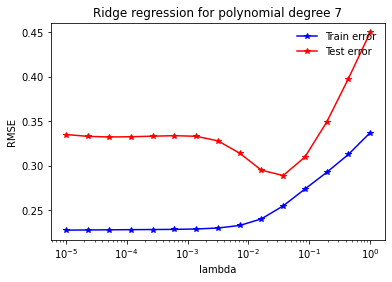

In [51]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)